In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# File path
file_path = 'legno.txt'

for line in open(file_path):
    try:
        #line should be like this:
        "Received: P:0.20,dP/dt:1.80"
        #remove the "Received: " part
        line = line.replace("Received: ", "")
        # Split the line into parts
        parts = line.split(',')
        # Extract the value after 'P:' and 'dP/dt:'
        p_value = float(parts[0].split(':')[1])
        dpdt_value = float(parts[1].split(':')[1])
        # Create a DataFrame with the extracted values
        df = pd.DataFrame({'P': [p_value], 'dP/dt': [dpdt_value]})
        # Append the DataFrame to a CSV file
        #remove .txt from the file name
        name = file_path.split('.')[0]      
        df.to_csv(f'{name}.csv', mode='a', header=False, index=False)
    except Exception as e:
        #skip the line if it doesn't match the expected format
        print(f"Error processing line: {line.strip()} - {e}")
        

# Read the CSV file
df = pd.read_csv(f'{name}.csv', names=['P', 'dP/dt'])
df.head()



    


Error processing line: Stop: pressione massima raggiunta - could not convert string to float: ' pressione massima raggiunta\n'
Error processing line: Closing locked until Button 2 is pressed - list index out of range


,P,dP/dt
0,0.30,3.85
1,0.27,1.81
2,0.19,-0.95
3,0.09,-3.32
4,0.11,-1.71


In [33]:
df

,P,dP/dt
0,0.30,3.85
1,0.27,1.81
2,0.19,-0.95
3,0.09,-3.32
4,0.11,-1.71
...,...,...
592,0.54,0.31
593,0.62,2.33
594,0.49,-1.73
595,0.67,3.18


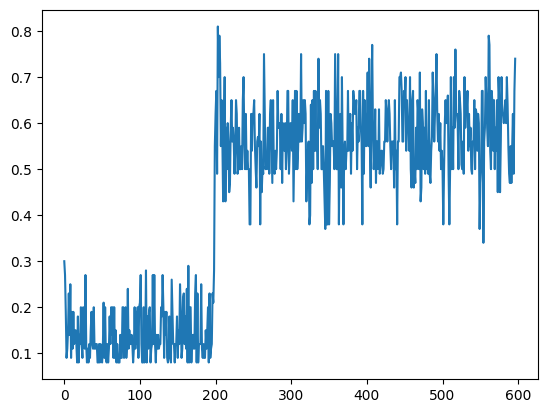

In [34]:
# print p over time
plt.plot(df['P'])
plt.savefig(f'{name}_pressure.png')
plt.show()

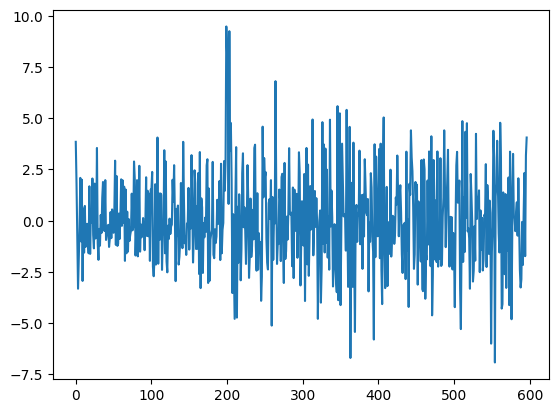

In [35]:
plt.plot(df['dP/dt'])
#save plot in name.png
plt.savefig(f'{name}_derivate.png')
plt.show()


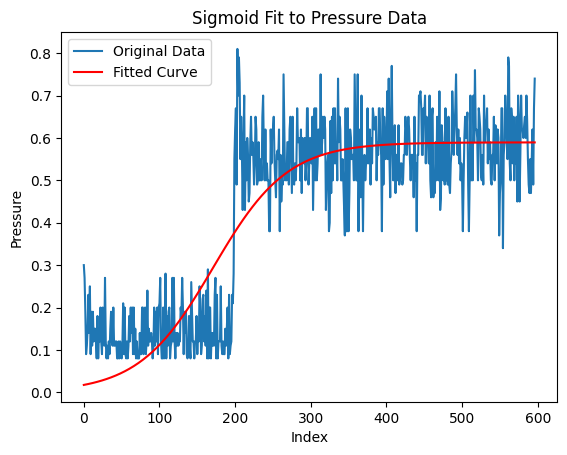

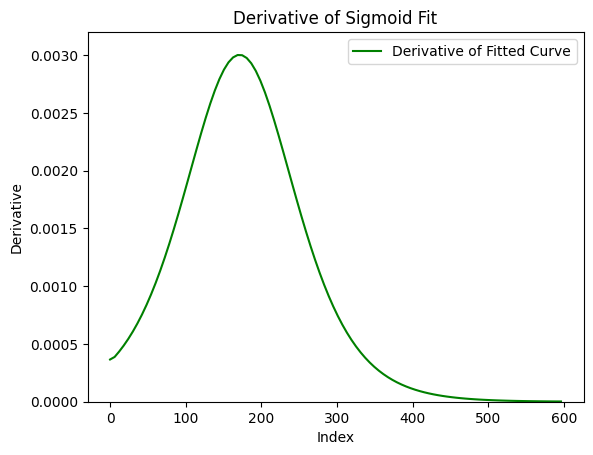

In [36]:

# fit a sigmoid function to the data
from scipy.optimize import curve_fit
import numpy as np


# Define the sigmoid function
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))
# Fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, df.index, df['P'], p0=[1, 1, 1])
# Generate x values for the fitted curve
x_fit = np.linspace(0, len(df) - 1, 100)
# Generate y values for the fitted curve
y_fit = sigmoid(x_fit, *popt)
# Plot the original data and the fitted curve
plt.plot(df['P'], label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.title('Sigmoid Fit to Pressure Data')
plt.xlabel('Index')
plt.ylabel('Pressure')
plt.savefig(f'{name}_sigmoid_fit.png')
plt.show()

# Plot the derivative of y_fit


y_fit_derivative = np.gradient(y_fit, x_fit)
plt.plot(x_fit, y_fit_derivative, label='Derivative of Fitted Curve', color='green')
plt.ylim([0.0, 0.0032])
plt.legend()
plt.title('Derivative of Sigmoid Fit')
plt.xlabel('Index')
plt.ylabel('Derivative')
plt.savefig(f'{name}_sigmoid_derivative.png')
plt.show()





In [37]:
#print max of the derivative
max_derivative = y_fit_derivative.max()
print(f'Maximum derivative: {max_derivative}')

Maximum derivative: 0.0030016948998023464
